In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [343]:
df=pd.read_csv('C:/Users/hrishikesh/Desktop/New_Capstones/Group 5_Diabetes/dataset_diabetes/dataset_diabetes/diabetic_data.csv')

In [344]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [345]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

## cleaning

In [346]:
df=df.replace('?',np.NaN)

In [347]:
df.isnull().sum()[df.isnull().sum()>0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

# Checking missing values %ages

In [348]:
def missing_check(df): #checking % of missing values in each columns
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#print("Missing check:",missing_data )
    return (missing_data)
missing_check(df)

,Total,Percent
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
num_procedures,0,0.000000
max_glu_serum,0,0.000000
number_diagnoses,0,0.000000


In [349]:
df=df.drop(['encounter_id','weight'],axis=1)

In [350]:
mode1=df['medical_specialty'].mode()[0]
df['medical_specialty']=df['medical_specialty'].fillna(mode1)

In [351]:
df['payer_code']=df['payer_code'].fillna(df['payer_code'].mode()[0])

In [352]:
df['race']=df['race'].replace(np.NaN,'Other')

In [353]:
df['diag_1']=df['diag_1'].replace(np.NaN,'0')

In [354]:
df['diag_2']=df['diag_2'].replace(np.NaN,'0')

In [355]:
df['diag_3']=df['diag_3'].replace(np.NaN,'0')

In [356]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      10176

## feature engineering

In [358]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)




In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null float64
diag_2                      1017

In [360]:
def diag1_cat(d1):
    if 390<=d1<=459 or d1==785:
         return 'circulatory'
    elif 520<d1<579 or d1==787:
         return 'digestive'
    elif 580<=d1<=629 or d1==788:
        return 'genitourinary'
    elif 800<=d1<=999:
        return 'injury'
    elif 710<=d1<=739:
        return 'musculoskeletal'
    elif 140<=d1<=239:
        return 'neoplasms'
    elif d1==250:
        return 'diabetes'
    elif d1==0:
        return 'Nil'
    else:
        return 'others'
df['diag_1']=df['diag_1'].apply(diag1_cat)

In [361]:
def diag2_cat(d2):
    if 390<=d2<=459 or d2==785:
         return 'circulatory'
    elif 520<=d2<=579 or d2==787:
         return 'digestive'
    elif 580<=d2<=629 or d2==788:
        return 'genitourinary'
    elif 800<=d2<=999:
        return 'injury'
    elif 710<=d2<=739:
        return 'musculoskeletal'
    elif 140<=d2<=239:
        return 'neoplasms'
    elif d2==250:
        return 'diabetes'
    elif d2==0:
        return 'Nil'
    else:
        return 'others'
df['diag_2']=df['diag_2'].apply(diag2_cat)

In [362]:
def diag3_cat(d3):
    if 390<=d3<=459 or d3==785:
         return 'circulatory'
    elif 520<=d3<=579 or d3==787:
         return 'digestive'
    elif 580<=d3<=629 or d3==788:
        return 'genitourinary'
    elif 800<=d3<=999:
        return 'injury'
    elif 710<=d3<=739:
        return 'musculoskeletal'
    elif 140<=d3<=239:
        return 'neoplasms'
    elif d3==250:
        return 'diabetes'
    elif d3==0:
        return 'Nil'
    else:
        return 'others'
df['diag_3']=df['diag_3'].apply(diag3_cat)

In [363]:
# def readmit_cat(ra):
#     if ra=='<30' or ra=='>30':
#         return 'Readmitted'
#     else:
#         return 'No'
# df['readmitted']=df['readmitted'].apply(readmit_cat)

In [364]:
def nolabp(nl):
    if 0<nl<=20:
         return '[1-20]'
    elif 21<=nl<=40:
         return '[20-40]'
    elif 41<=nl<=60:
        return '[40-60]'
    elif 61<=nl<=80:
        return '[60-80]'
    elif 81<=nl<=100:
        return '[80-100]'
    elif 101<=nl<=132:
        return '[100-132]'
df['num_lab_procedures']=df['num_lab_procedures'].apply(nolabp)

In [365]:
df['num_lab_procedures']

0         [40-60]
1         [40-60]
2          [1-20]
3         [40-60]
4         [40-60]
5         [20-40]
6         [60-80]
7         [60-80]
8         [60-80]
9         [20-40]
10        [40-60]
11        [60-80]
12        [40-60]
13        [40-60]
14        [40-60]
15        [60-80]
16        [40-60]
17        [20-40]
18        [20-40]
19        [40-60]
20        [60-80]
21        [20-40]
22        [40-60]
23        [40-60]
24         [1-20]
25        [20-40]
26        [60-80]
27        [20-40]
28        [40-60]
29        [40-60]
           ...   
101736    [40-60]
101737    [40-60]
101738    [20-40]
101739    [20-40]
101740     [1-20]
101741    [20-40]
101742    [40-60]
101743    [40-60]
101744    [40-60]
101745    [40-60]
101746     [1-20]
101747    [40-60]
101748    [60-80]
101749    [20-40]
101750    [20-40]
101751    [60-80]
101752     [1-20]
101753    [40-60]
101754    [40-60]
101755    [60-80]
101756    [40-60]
101757    [20-40]
101758    [60-80]
101759     [1-20]
101760    

In [366]:
def nom(nm):
    if 0<nm<=10:
         return '[1-10]'
    elif 11<=nm<=20:
         return '[10-20]'
    elif 21<=nm<=30:
        return '[20-30]'
    elif 31<=nm<=40:
        return '[30-40]'
    elif 41<=nm<=50:
        return '[40-50]'
    elif 51<=nm<=60:
        return '[50-60]'
    elif 61<=nm<=70:
        return '[60-70]'
    elif 71<=nm<=81:
        return '[70-81]'
df['num_medications']=df['num_medications'].apply(nom)

In [367]:
df['num_medications']

0          [1-10]
1         [10-20]
2         [10-20]
3         [10-20]
4          [1-10]
5         [10-20]
6         [20-30]
7         [10-20]
8         [20-30]
9         [10-20]
10        [10-20]
11        [10-20]
12        [10-20]
13        [30-40]
14         [1-10]
15        [10-20]
16        [10-20]
17        [10-20]
18        [20-30]
19        [20-30]
20        [10-20]
21        [10-20]
22        [10-20]
23        [10-20]
24        [10-20]
25         [1-10]
26        [10-20]
27        [10-20]
28        [10-20]
29        [10-20]
           ...   
101736    [10-20]
101737    [20-30]
101738     [1-10]
101739    [10-20]
101740     [1-10]
101741     [1-10]
101742     [1-10]
101743    [20-30]
101744    [10-20]
101745     [1-10]
101746     [1-10]
101747    [10-20]
101748    [10-20]
101749    [20-30]
101750    [20-30]
101751    [60-70]
101752     [1-10]
101753    [10-20]
101754    [30-40]
101755    [20-30]
101756    [10-20]
101757    [10-20]
101758    [20-30]
101759    [10-20]
101760    

In [368]:
df['num_medications'].isnull().sum()

0

In [369]:
df.to_csv('Modelcapstone4.csv',index=False)

In [370]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [371]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null int64
num_medications             101766 non-null object
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101

In [251]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [252]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [222]:
for i in cat_col:
   print(i,'\n',df[i].value_counts(normalize=True).mul(100).round(2).astype(str)+'%')

race 
 Caucasian          77.01%
AfricanAmerican    18.88%
Hispanic             2.0%
Other               1.48%
Asian               0.63%
Name: race, dtype: object
gender 
 Female             53.76%
Male               46.24%
Unknown/Invalid      0.0%
Name: gender, dtype: object
age 
 [70-80)     25.62%
[60-70)     22.09%
[50-60)     16.96%
[80-90)      16.9%
[40-50)      9.52%
[30-40)      3.71%
[90-100)     2.74%
[20-30)      1.63%
[10-20)      0.68%
[0-10)       0.16%
Name: age, dtype: object
payer_code 
 MC    71.43%
HM     6.17%
SP     4.92%
BC     4.57%
MD     3.47%
CP     2.49%
UN     2.41%
CM      1.9%
OG     1.02%
PO     0.58%
DM     0.54%
CH     0.14%
WC     0.13%
OT     0.09%
MP     0.08%
SI     0.05%
FR      0.0%
Name: payer_code, dtype: object
medical_specialty 
 InternalMedicine                     63.46%
Emergency/Trauma                      7.43%
Family/GeneralPractice                7.31%
Cardiology                            5.26%
Surgery-General                       3

In [224]:
df.to_csv('cleanedata1.csv',index=False)

In [130]:
d=df

In [131]:
d

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,Readmitted
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,No
3,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,No
4,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
5,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,Readmitted
6,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
7,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,Readmitted
8,48330783,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
9,63555939,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No


## Univariate and bivariate analysis (univariate analysis not complete)

In [132]:
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

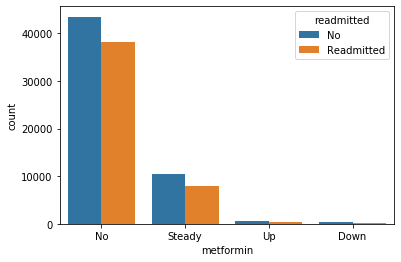

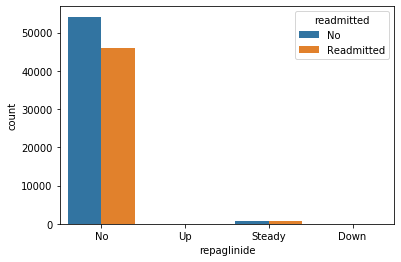

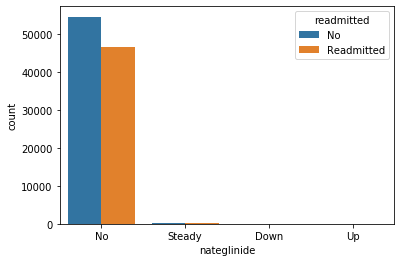

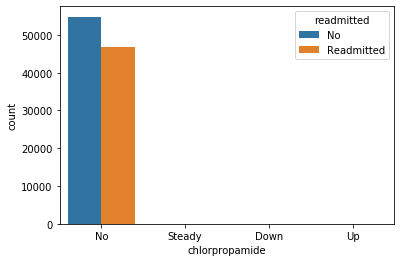

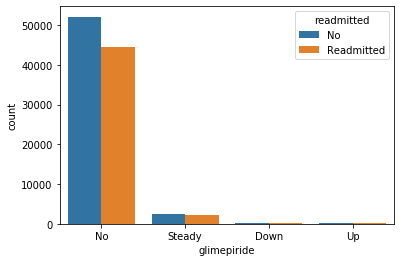

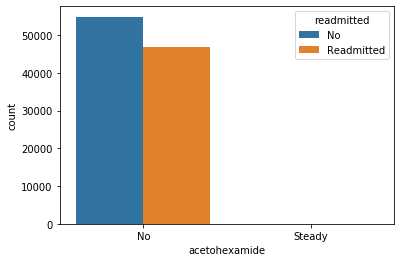

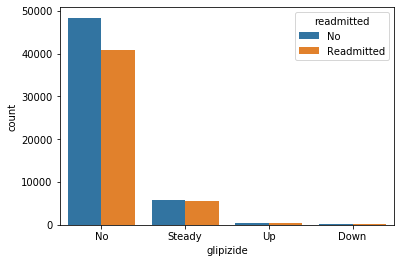

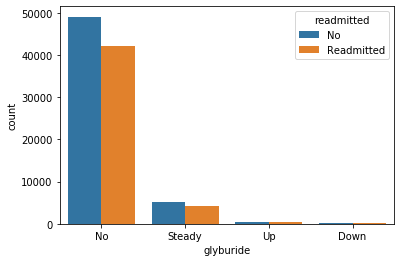

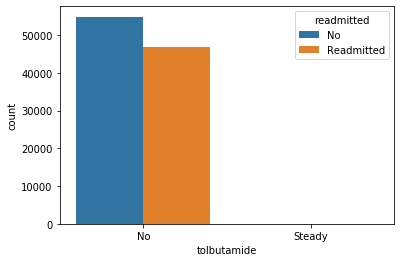

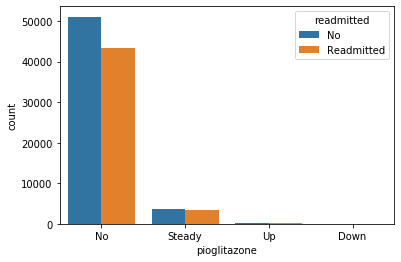

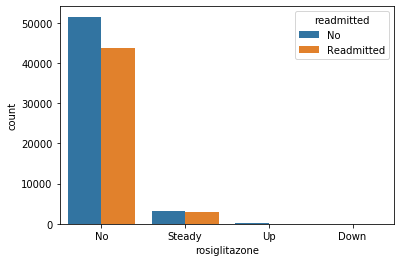

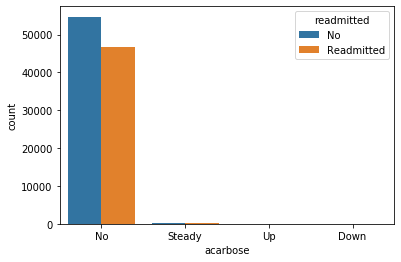

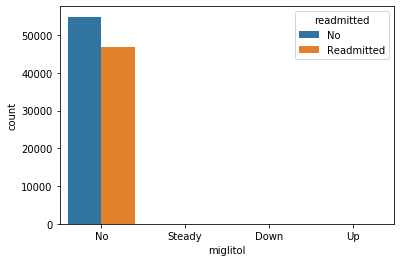

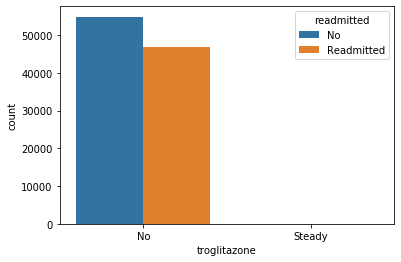

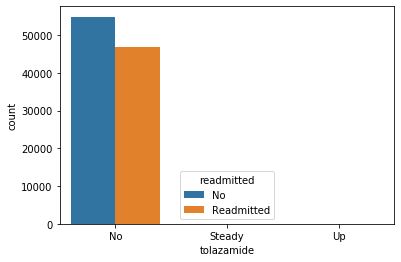

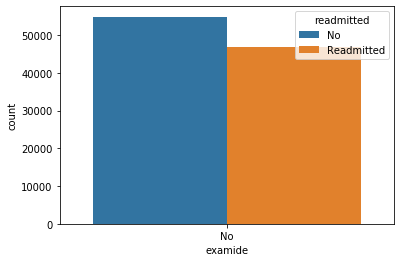

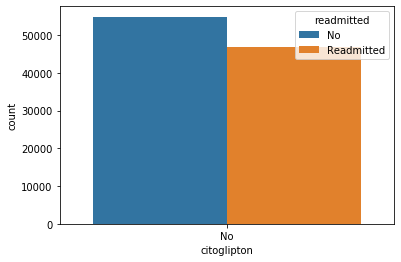

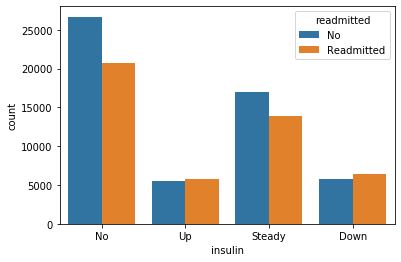

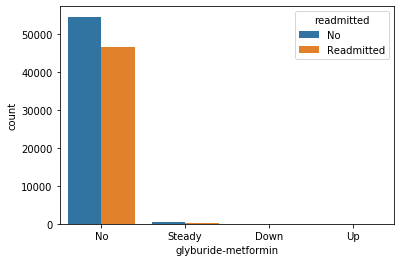

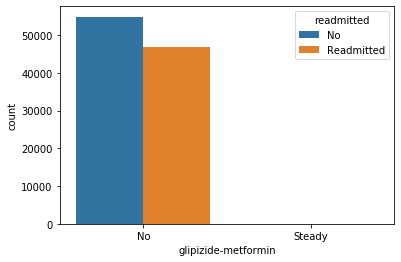

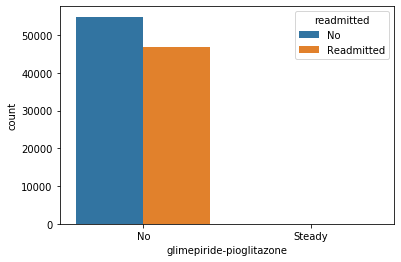

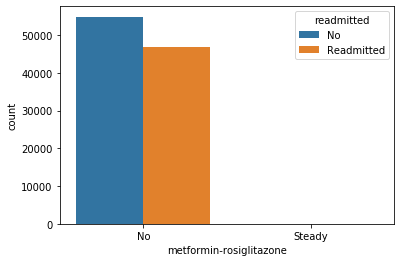

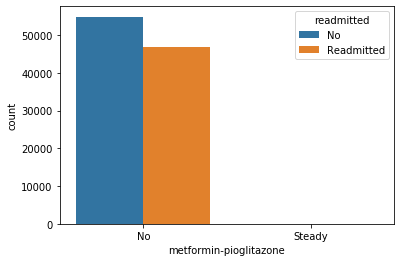

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols=list(d24_cols)
for col in num_cols:
    plt.figure()
    sns.countplot(df[col],hue='readmitted',data=df)
    plt.show()

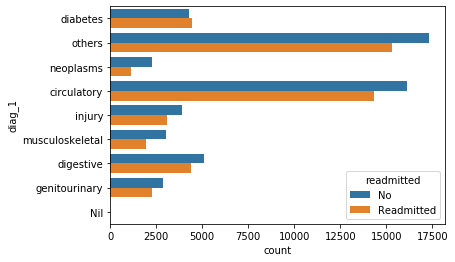

In [134]:
sns.countplot(y='diag_1',hue='readmitted',data=df)

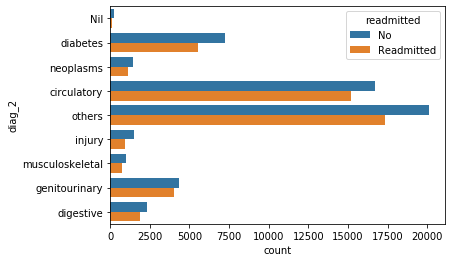

In [135]:
sns.countplot(y='diag_2',hue='readmitted',data=df)

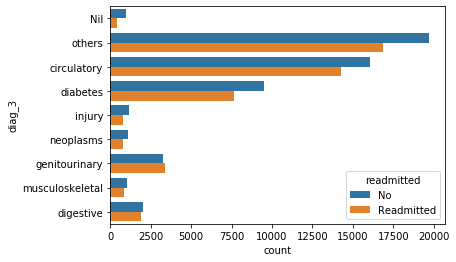

In [136]:
sns.countplot(y='diag_3',hue='readmitted',data=df)

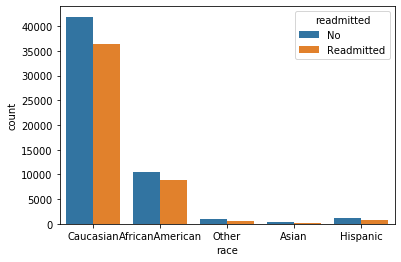

In [137]:
sns.countplot(x='race',hue='readmitted',data=df)

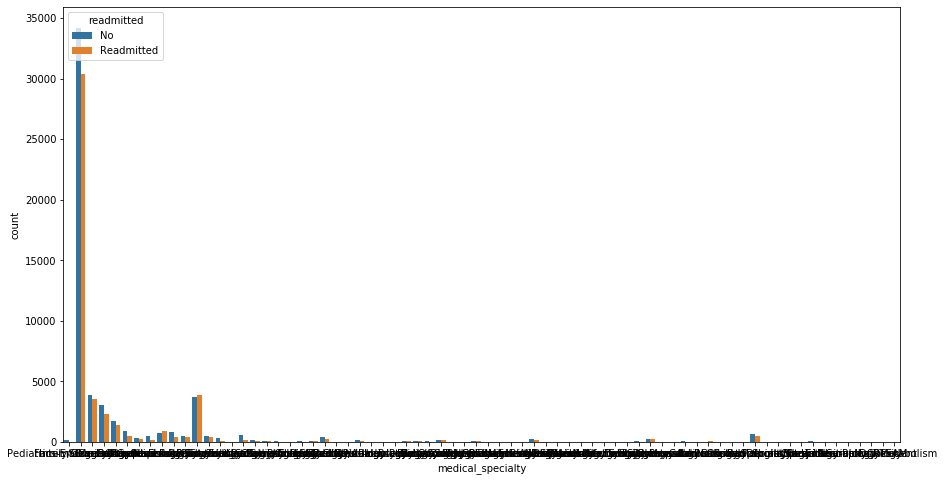

In [138]:
plt.figure(figsize=(15,8))
sns.countplot(x='medical_specialty',hue='readmitted',data=df)

In [139]:
df['medical_specialty'].value_counts()

InternalMedicine                     64584
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-Endocrinology               159
Otolaryngol

In [140]:
# cat_cols = list(df.select_dtypes('object').columns)
# class_dict = {}
# for col in cat_cols:
#     df1 = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
# df1.head()

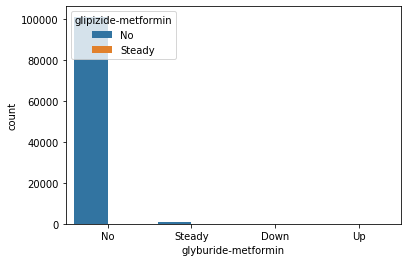

In [141]:
sns.countplot(x='glyburide-metformin',hue='glipizide-metformin',data=df)

In [142]:
df.groupby('readmitted').agg({'insulin':'count','metformin':'count','glyburide-metformin':'count'})

,insulin,metformin,glyburide-metformin
readmitted,,,
No,54864,54864,54864
Readmitted,46902,46902,46902


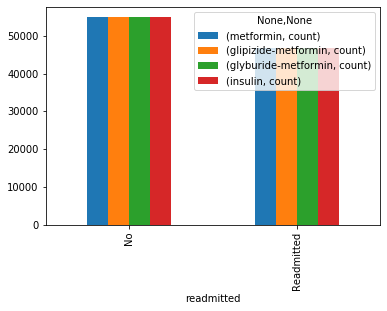

In [143]:
df.groupby('readmitted')[['metformin','glipizide-metformin','glyburide-metformin','insulin']].agg(['count']).plot.bar()

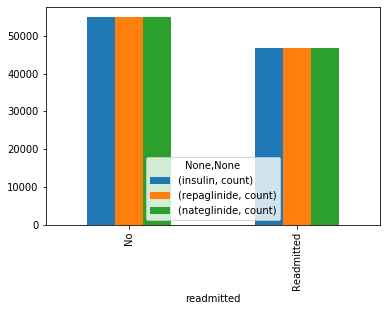

In [144]:
df.groupby('readmitted')[['insulin','repaglinide','nateglinide']].agg(['count']).plot.bar()

In [145]:
df.corr()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
patient_nbr,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.062352,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539


In [146]:
df.readmitted

0                 No
1         Readmitted
2                 No
3                 No
4                 No
5         Readmitted
6                 No
7         Readmitted
8                 No
9                 No
10        Readmitted
11        Readmitted
12        Readmitted
13                No
14        Readmitted
15                No
16        Readmitted
17                No
18        Readmitted
19                No
20                No
21                No
22                No
23        Readmitted
24                No
25                No
26                No
27        Readmitted
28        Readmitted
29        Readmitted
             ...    
101736    Readmitted
101737            No
101738            No
101739            No
101740            No
101741            No
101742            No
101743            No
101744            No
101745            No
101746    Readmitted
101747    Readmitted
101748    Readmitted
101749            No
101750    Readmitted
101751            No
101752       

In [147]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,Readmitted
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,No
3,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,No
4,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
5,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,Readmitted
6,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
7,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,Readmitted
8,48330783,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
9,63555939,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No


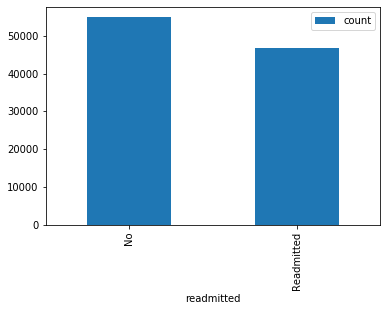

In [148]:
df.groupby('readmitted')['insulin'].agg(['count']).plot.bar()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      10176

In [150]:
max(df['num_lab_procedures'])

132

In [151]:
max(df['num_medications'])

81

In [159]:
df['num_lab_procedures'].value_counts()

40-60      40066
20-40      27749
60-80      17475
1-20       14536
80-100      1876
100-132       64
Name: num_lab_procedures, dtype: int64

In [158]:
df['num_medications'].value_counts()

10-20    52025
1-10     25861
20-30    18643
30-40     3876
40-50      931
50-60      333
60-70       89
70-80        7
Name: num_medications, dtype: int64

In [154]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,Readmitted
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,No
3,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,No
4,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
5,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,Readmitted
6,84259809,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
7,114882984,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,Readmitted
8,48330783,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No
9,63555939,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,No


In [155]:
df['num_medications']

0          1-10
1         10-20
2         10-20
3         10-20
4          1-10
5         10-20
6         20-30
7         10-20
8         20-30
9         10-20
10        10-20
11        10-20
12        10-20
13        30-40
14         1-10
15        10-20
16        10-20
17        10-20
18        20-30
19        20-30
20        10-20
21        10-20
22        10-20
23        10-20
24        10-20
25         1-10
26        10-20
27        10-20
28        10-20
29        10-20
          ...  
101736    10-20
101737    20-30
101738     1-10
101739    10-20
101740     1-10
101741     1-10
101742     1-10
101743    20-30
101744    10-20
101745     1-10
101746     1-10
101747    10-20
101748    10-20
101749    20-30
101750    20-30
101751    60-70
101752     1-10
101753    10-20
101754    30-40
101755    20-30
101756    10-20
101757    10-20
101758    20-30
101759    10-20
101760    20-30
101761    10-20
101762    10-20
101763     1-10
101764    20-30
101765     1-10
Name: num_medications, L

In [156]:
df=df.drop(['medical_specialty','payer_code'],axis=1)

In [157]:
df.to_csv('Capstone1.csv',index=False)

In [45]:
catg=df[['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]
#contains CATEGORICAL nominal
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catg = catg.apply(le.fit_transform)
catg.head()
df = df.drop(catg.columns, axis=1)
df = pd.concat([df, catg], axis=1)
df.head()


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,6,25,1,1,41,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1,55629189,1,1,7,3,59,0,18,0,0,...,0,3,1,0,0,0,0,0,1,1
2,86047875,1,1,7,2,11,5,13,2,0,...,0,1,1,0,0,0,0,1,1,0
3,82442376,1,1,7,2,44,1,16,0,0,...,0,3,1,0,0,0,0,0,1,0
4,42519267,1,1,7,1,51,0,8,0,0,...,0,2,1,0,0,0,0,0,1,0


In [46]:
df

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,6,25,1,1,41,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1,55629189,1,1,7,3,59,0,18,0,0,...,0,3,1,0,0,0,0,0,1,1
2,86047875,1,1,7,2,11,5,13,2,0,...,0,1,1,0,0,0,0,1,1,0
3,82442376,1,1,7,2,44,1,16,0,0,...,0,3,1,0,0,0,0,0,1,0
4,42519267,1,1,7,1,51,0,8,0,0,...,0,2,1,0,0,0,0,0,1,0
5,82637451,2,1,2,3,31,6,16,0,0,...,0,2,1,0,0,0,0,1,1,1
6,84259809,3,1,2,4,70,1,21,0,0,...,0,2,1,0,0,0,0,0,1,0
7,114882984,1,1,7,5,73,0,12,0,0,...,0,1,1,0,0,0,0,1,1,1
8,48330783,2,1,4,13,68,2,28,0,0,...,0,2,1,0,0,0,0,0,1,0
9,63555939,3,3,4,12,33,3,18,0,0,...,0,2,1,0,0,0,0,0,1,0


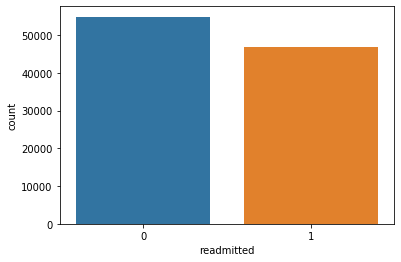

In [47]:
sns.countplot(x='readmitted',data=df)

In [48]:
contingency_table = pd.crosstab(
    df['insulin'],
    df['readmitted'],
    margins = True
)
contingency_table

readmitted,0,1,All
insulin,,,
0,5768,6450,12218
1,26678,20705,47383
2,16934,13915,30849
3,5484,5832,11316
All,54864,46902,101766


In [49]:
from scipy import stats
stats.chi2_contingency(contingency_table)

(477.15251930504627,
 5.595640081930974e-98,
 8,
 array([[  6586.95784447,   5631.04215553,  12218.        ],
        [ 25545.08295501,  21837.91704499,  47383.        ],
        [ 16631.2868345 ,  14217.7131655 ,  30849.        ],
        [  6100.67236602,   5215.32763398,  11316.        ],
        [ 54864.        ,  46902.        , 101766.        ]]))

In [50]:
contingency_table1 = pd.crosstab(
    df['readmitted'],
    df['metformin'],
    margins = True
)
contingency_table1

metformin,0,1,2,3,All
readmitted,,,,,
0,316,43521,10395,632,54864
1,259,38257,7951,435,46902
All,575,81778,18346,1067,101766


In [51]:
from scipy import stats
stats.chi2_contingency(contingency_table1)

(84.02635625342182,
 7.538352762856922e-15,
 8,
 array([[   309.99351453,  44088.08631567,   9890.68003066,
            575.24013914,  54864.        ],
        [   265.00648547,  37689.91368433,   8455.31996934,
            491.75986086,  46902.        ],
        [   575.        ,  81778.        ,  18346.        ,
           1067.        , 101766.        ]]))

In [52]:
contingency_table1 = pd.crosstab(
    df['repaglinide'],
    df['readmitted'],
    margins = True
)
contingency_table1

readmitted,0,1,All
repaglinide,,,
0,23,22,45
1,54170,46057,100227
2,614,770,1384
3,57,53,110
All,54864,46902,101766


In [53]:
from scipy import stats
stats.chi2_contingency(contingency_table1)

(51.85239944645475,
 1.79724006474626e-08,
 8,
 array([[2.42603620e+01, 2.07396380e+01, 4.50000000e+01],
        [5.40342956e+04, 4.61927044e+04, 1.00227000e+05],
        [7.46140912e+02, 6.37859088e+02, 1.38400000e+03],
        [5.93031071e+01, 5.06968929e+01, 1.10000000e+02],
        [5.48640000e+04, 4.69020000e+04, 1.01766000e+05]]))

In [54]:
contingency_table2 = pd.crosstab(
    df['race'],
    df['readmitted'],
    margins = True
)
contingency_table2

readmitted,0,1,All
race,,,
0,10421,8789,19210
1,415,226,641
2,41930,36442,78372
3,1183,854,2037
4,915,591,1506
All,54864,46902,101766


In [55]:
from scipy import stats
stats.chi2_contingency(contingency_table2)

(79.06520306638988,
 7.653367980049984e-13,
 10,
 array([[ 10356.47898119,   8853.52101881,  19210.        ],
        [   345.57537881,    295.42462119,    641.        ],
        [ 42251.84647132,  36120.15352868,  78372.        ],
        [  1098.18572018,    938.81427982,   2037.        ],
        [   811.9134485 ,    694.0865515 ,   1506.        ],
        [ 54864.        ,  46902.        , 101766.        ]]))

In [56]:
contingency_table3 = pd.crosstab(
    df['glimepiride-pioglitazone'],
    df['readmitted'],
    margins = True
)
contingency_table3

readmitted,0,1,All
glimepiride-pioglitazone,,,
0,54864,46901,101765
1,0,1,1
All,54864,46902,101766


In [57]:
from scipy import stats
stats.chi2_contingency(contingency_table3)

(1.169769713966428,
 0.8830503153465021,
 4,
 array([[5.48634609e+04, 4.69015391e+04, 1.01765000e+05],
        [5.39119156e-01, 4.60880844e-01, 1.00000000e+00],
        [5.48640000e+04, 4.69020000e+04, 1.01766000e+05]]))

In [58]:
contingency_table4 = pd.crosstab(
    df['glipizide-metformin'],
    df['readmitted'],
    margins = True
)
contingency_table3

readmitted,0,1,All
glimepiride-pioglitazone,,,
0,54864,46901,101765
1,0,1,1
All,54864,46902,101766


In [59]:
stats.chi2_contingency(contingency_table3)

(1.169769713966428,
 0.8830503153465021,
 4,
 array([[5.48634609e+04, 4.69015391e+04, 1.01765000e+05],
        [5.39119156e-01, 4.60880844e-01, 1.00000000e+00],
        [5.48640000e+04, 4.69020000e+04, 1.01766000e+05]]))

In [60]:
from statsmodels.tools import add_constant as add_constant      #asigning beta not
df_constant = add_constant(df)
df_constant.head()

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1.0,8222157,6,25,1,1,41,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1,1.0,55629189,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,1
2,1.0,86047875,1,1,7,2,11,5,13,2,...,0,1,1,0,0,0,0,1,1,0
3,1.0,82442376,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,0
4,1.0,42519267,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,0


In [61]:
import statsmodels.api as sm
import scipy.stats as st

In [62]:
import statsmodels.api as sm
# Logistic regression model
# logm1 = sm.GLM(df['readmitted'],df, family = sm.families.Binomial()) #generalized linear model glm
# logm1.fit().summary()


## feature selection

## have to use chisquare test 

chisquare for all the columns

In [63]:
df_cols=df[::]

alpha=0.05

In [64]:
num_cols=list(df_cols)
pvalue=[]
for col in num_cols:
    contingency_table= pd.crosstab(
    df[col],
    df['readmitted'],
    margins = True)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    print(col,"===P-Value===")
    print(p_val)
    pvalue.append(p_val)

patient_nbr ===P-Value===
1.0
admission_type_id ===P-Value===
5.612320375291468e-72
discharge_disposition_id ===P-Value===
0.0
admission_source_id ===P-Value===
1.4654719391006867e-205
time_in_hospital ===P-Value===
9.759585999157206e-76
num_lab_procedures ===P-Value===
3.1303050485630316e-09
num_procedures ===P-Value===
8.820828618416213e-41
num_medications ===P-Value===
6.771357336908658e-123
number_outpatient ===P-Value===
4.969157604118948e-220
number_emergency ===P-Value===
0.0
number_inpatient ===P-Value===
0.0
number_diagnoses ===P-Value===
1.3814192880976482e-275
race ===P-Value===
7.653367980049984e-13
gender ===P-Value===
3.359517768930365e-06
age ===P-Value===
5.429508862281459e-41
diag_1 ===P-Value===
6.64341575738236e-81
diag_2 ===P-Value===
1.2308305397591599e-28
diag_3 ===P-Value===
5.291713629256547e-49
max_glu_serum ===P-Value===
5.956806150345531e-08
A1Cresult ===P-Value===
8.613299514046147e-09
metformin ===P-Value===
7.538352762856895e-15
repaglinide ===P-Value===
1

In [65]:
num_cols=list(df_cols)
association=[]
noassociation=[]
relation=[]
for col in num_cols:
    contingency_table= pd.crosstab(df[col],df['readmitted'],margins = True)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    
    if(p_val>0.05):
        print(col,'\t Not associated')
        noassociation.append(col)
        relation.append('Notassociated')
    else:
        print(col,'\t Associated')
        association.append(col)
        relation.append('Associated')
        

patient_nbr 	 Not associated
admission_type_id 	 Associated
discharge_disposition_id 	 Associated
admission_source_id 	 Associated
time_in_hospital 	 Associated
num_lab_procedures 	 Associated
num_procedures 	 Associated
num_medications 	 Associated
number_outpatient 	 Associated
number_emergency 	 Associated
number_inpatient 	 Associated
number_diagnoses 	 Associated
race 	 Associated
gender 	 Associated
age 	 Associated
diag_1 	 Associated
diag_2 	 Associated
diag_3 	 Associated
max_glu_serum 	 Associated
A1Cresult 	 Associated
metformin 	 Associated
repaglinide 	 Associated
nateglinide 	 Not associated
chlorpropamide 	 Not associated
glimepiride 	 Not associated
acetohexamide 	 Not associated
glipizide 	 Associated
glyburide 	 Not associated
tolbutamide 	 Not associated
pioglitazone 	 Associated
rosiglitazone 	 Associated
acarbose 	 Associated
miglitol 	 Not associated
troglitazone 	 Not associated
tolazamide 	 Not associated
examide 	 Not associated
citoglipton 	 Not associated
ins

In [66]:
pvalues=[1.0,5.612320375291468e-72,0.0,1.4654719391006867e-205,9.759585999157206e-76,3.1303050485630316e-09,8.820828618416213e-41,6.771357336908658e-123,4.969157604118948e-220,0.0,0.0,1.3814192880976482e-275,7.653367980049984e-13,3.359517768930365e-06,5.429508862281459e-41,2.6190931410676262e-82,5.593298142863809e-21,4.500797415843912e-28,5.956806150345531e-08,8.613299514046147e-09,7.538352762856895e-15,1.79724006474626e-08,0.9811335093195492,0.8093841051933762,0.8164547565411711,0.8830503153465021,3.0130902490768304e-07,0.82028111686816,0.880824644759777,0.03514400303666847,0.00026940662572336264,0.004644433380658863,0.46814757573932175,0.972389805598048,0.6240180729932758,1.0,1.0,5.595640081930974e-98,0.5314598710167493,0.8699472780323871,0.8830503153465021,0.7889387474482545,0.9309420434348626,1.8239442204301753e-45,4.816702394413275e-82,0.0]

In [67]:
num_cols=list(df_cols)
association1=[]
noassociation1=[]
relation1=[]
for col in num_cols:
    contingency_table= pd.crosstab(df[col],df['readmitted'],margins = True)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    
    if(p_val>0.01):
        print(col,'\t Has no association')
        noassociation1.append(col)
        relation1.append('Notassociated')
    else:
        print(col,'\t Has association')
        association1.append(col)
        relation1.append('Associated')

patient_nbr 	 Has no association
admission_type_id 	 Has association
discharge_disposition_id 	 Has association
admission_source_id 	 Has association
time_in_hospital 	 Has association
num_lab_procedures 	 Has association
num_procedures 	 Has association
num_medications 	 Has association
number_outpatient 	 Has association
number_emergency 	 Has association
number_inpatient 	 Has association
number_diagnoses 	 Has association
race 	 Has association
gender 	 Has association
age 	 Has association
diag_1 	 Has association
diag_2 	 Has association
diag_3 	 Has association
max_glu_serum 	 Has association
A1Cresult 	 Has association
metformin 	 Has association
repaglinide 	 Has association
nateglinide 	 Has no association
chlorpropamide 	 Has no association
glimepiride 	 Has no association
acetohexamide 	 Has no association
glipizide 	 Has association
glyburide 	 Has no association
tolbutamide 	 Has no association
pioglitazone 	 Has no association
rosiglitazone 	 Has association
acarbose 	 H

In [68]:
print('with assoiation list ',association1,'\n','\n \n no association',noassociation1)

with assoiation list  ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glipizide', 'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed', 'readmitted'] 
 
 
 no association ['patient_nbr', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'pioglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [69]:
len(noassociation1)

18

In [70]:
data11={'Columns':num_cols,'Pvalues':pvalues,'Relationwithtarget':relation1}
df11=pd.DataFrame(data11)

In [71]:
df11

,Columns,Pvalues,Relationwithtarget
0,patient_nbr,1.000000e+00,Notassociated
1,admission_type_id,5.612320e-72,Associated
2,discharge_disposition_id,0.000000e+00,Associated
3,admission_source_id,1.465472e-205,Associated
4,time_in_hospital,9.759586e-76,Associated
5,num_lab_procedures,3.130305e-09,Associated
6,num_procedures,8.820829e-41,Associated
7,num_medications,6.771357e-123,Associated
8,number_outpatient,4.969158e-220,Associated
9,number_emergency,0.000000e+00,Associated


In [72]:
dfas=df11[df11['Relationwithtarget']=='Associated']

## with respect to selected features

In [73]:
df1=df.drop(['patient_nbr', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'pioglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'],axis=1)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 28 columns):
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
number_diagnoses            101766 non-null int64
race                        101766 non-null int32
gender                      101766 non-null int32
age                         101766 non-null int32
diag_1                      101766 non-null int32
diag_2                      101766 non-null int32
diag_3                      101766 non-null int32
max_glu_serum               101766 non-

In [75]:
x=df1.drop('readmitted',axis=1)
y=df1['readmitted']

## logistic regression

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter

In [80]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6207133732927189

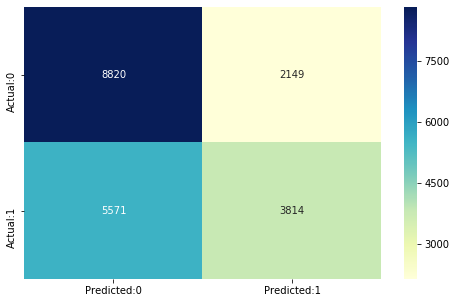

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#this is a unbalanced data make it balanced

In [82]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [83]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6207133732927189 

 The Miss-classification = 1-Accuracy =  0.3792866267072811 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.40639318060735213 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8040842373962986 

 Positive Predictive value = TP / (TP+FP) =  0.639610934093577 

 Negative predictive Value = TN / (TN+FN) =  0.6128830519074422 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  2.074326104272706 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.7382395920541898


In [84]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=log_reg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[    0 10969]
 [    0  9385]] 
 with 9385 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[    6 10963]
 [    0  9385]] 
 with 9391 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0005469960798614277 



With 0.3 threshold the Confusion Matrix is  
 [[ 979 9990]
 [ 306 9079]] 
 with 10058 correct predictions and 306 Type II errors( False Negatives) 

 Sensitivity:  0.967394778902504 Specificity:  0.08925152703072295 



With 0.4 threshold the Confusion Matrix is  
 [[5064 5905]
 [2434 6951]] 
 with 12015 correct predictions and 2434 Type II errors( False Negatives) 

 Sensitivity:  0.7406499733617474 Specificity:  0.46166469140304495 





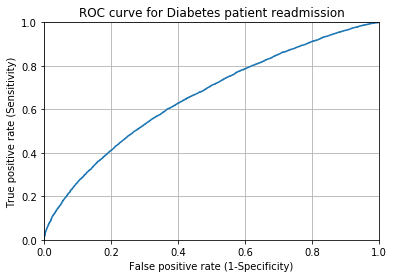

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes patient readmission')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [86]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.6594313523562529

In [87]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(x_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)



---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.41
Precision Score: 0.64
F1 Score: 0.50
Accuracy Score: 0.62
---------------------------------------------------------------------------------------------------------------------------------------


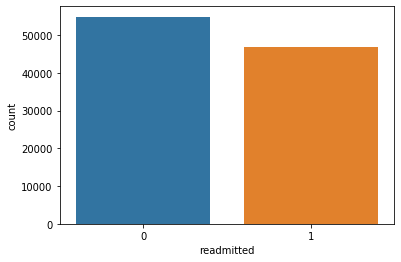

In [88]:
sns.countplot(x='readmitted',data=df)

In [89]:
df['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [90]:
len(y_pred)


81412

In [91]:
y_pred_log_reg = log_reg.predict(x_test)

In [92]:
*96536+9from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_log_reg))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.80      0.70     10969
           1       0.64      0.41      0.50      9385

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.60     20354



## tuned logistic regresson 

In [93]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hris

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\si

In [94]:
log_reg.fit(x_train, y_train)

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1',random_state=None, solver='warn', tol=0.0001, verbose=0,warm_start=False)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6208607644689005

In [97]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_log_reg))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.80      0.70     10969
           1       0.64      0.41      0.50      9385

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.60     20354



## knn model

In [98]:
x=df1.drop('readmitted',axis=1)
y=df1['readmitted']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [100]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))


In [101]:
test_accuracy

[0.5447756305273501,
 0.5583360628889616,
 0.5564035375040943,
 0.5653455617425484,
 0.563937111038323,
 0.5726826072715362,
 0.5716999672453325,
 0.5773010153946937,
 0.5737635113003603,
 0.5761218473632492]

In [102]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.58


## tuned knn

In [103]:
# from sklearn.model_selection import GridSearchCV
# grid = {'n_neighbors': np.arange(1,25)}
# knn = KNeighborsClassifier()
# knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
# knn_cv.fit(x,y)# Fit

# # Print hyperparameter
# print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
# print("Best score: {}".format(knn_cv.best_score_))

## decision tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
dtree_pred = dtree.predict(x_test)

In [106]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

Accuracy is 0.57
Precision is 0.53
Recall is 0.50


## tuned decision tree

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(x_train)
X_test_scaler = scaler.fit_transform(x_test)

In [108]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')

In [109]:
giniDecisionTree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
giniPred = giniDecisionTree.predict(X_test_scaler)

In [111]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.5617097936455945


## Random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [113]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6321978381919423


In [114]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     16549
           1       0.61      0.53      0.57     13981

    accuracy                           0.63     30530
   macro avg       0.63      0.62      0.62     30530
weighted avg       0.63      0.63      0.63     30530



## tuned random forest

In [115]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.634457910252211
Confusion Metrix:
 [[11846  6457]
 [ 4703  7524]]


In [117]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30,criterion='entropy', min_samples_leaf= 3, min_samples_split= 7, n_jobs=-1, random_state=123)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.634457910252211


In [119]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     16549
           1       0.62      0.54      0.57     13981

    accuracy                           0.63     30530
   macro avg       0.63      0.63      0.63     30530
weighted avg       0.63      0.63      0.63     30530



### Adaboost

In [120]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier

In [121]:
# Create a classifier and fit the data
clf = AdaBoostClassifier(random_state=1)
clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [122]:
y_pred = clf.predict(x_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.6351457582705535


In [123]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.77      0.69     16549
           1       0.63      0.48      0.55     13981

    accuracy                           0.64     30530
   macro avg       0.63      0.62      0.62     30530
weighted avg       0.63      0.64      0.63     30530



In [124]:
methods=['Logistic','Tuned logistic','KNN','Tuned KNN','DecisionTree','Tuned Decision tree','Random Forest','Tuned Random forest','Ada Boosting']

In [125]:
Scores=[0.62,0.6209,0.56,0.59,0.56,0.60,0.63,0.64,0.64]

In [126]:
data11={'Columns':num_cols,'Pvalues':pvalues,'Relationwithtarget':relation1}
df11=pd.DataFrame(data11)

In [127]:
from sklearn.preprocessing import Imputer

In [128]:
my_imputer = Imputer()
train_X = my_imputer.fit_transform(x_train)
test_X = my_imputer.transform(x_test)

C:\Users\hrishikesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [129]:
from xgboost import XGBClassifier

my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, y_train, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
predictions = my_model.predict(test_X)

In [131]:
print('Accuracy: {}'.format(accuracy_score(predictions, y_test)))

Accuracy: 0.6412381264330167


In [132]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.76      0.70     16549
           1       0.64      0.51      0.56     13981

    accuracy                           0.64     30530
   macro avg       0.64      0.63      0.63     30530
weighted avg       0.64      0.64      0.64     30530



## tuned xgboost


In [133]:
my_model = XGBClassifier(n_estimators=1000)
my_model.fit(train_X, y_train, early_stopping_rounds=5, 
             eval_set=[(test_X, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [134]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1, verbosity=1)

In [135]:
tunedprediction=my_model.predict(test_X)

In [136]:
print('Accuracy: {}'.format(accuracy_score(tunedprediction, y_test)))

Accuracy: 0.6246642646577137
